# NumPy 多维数组的常用操作

上一篇对 NumPy 中最基本的概念 ndarray 对象已经作了图文并茂的介绍。

我们对它的基本要素以及索引和切片等必备知识有了认识。本篇将接着对**常用函数**以及重要的**广播机制**作进一步介绍。

In [1]:
import numpy as np

## 1、创建常用数组

- 创建全是 `1` 的数组，注意参数是表示数组 `shape` 的元组。

In [6]:
arr_ones = np.ones((3,4))
arr_ones

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [7]:
arr_ones.dtype

dtype('float64')

- 创建全是 `0` 的数组

In [8]:
arr_zeros = np.zeros((3,4))
arr_zeros

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

- 创建单位矩阵

In [9]:
# 返回一个二维数组，对角线上元素全是 1，其他元素全为 0。

arr_eye = np.eye(3, dtype=np.int64)
arr_eye

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

- 创建给定 `shape` 和 `dtype` 的新数组，而无需初始化元素。

In [11]:
arr_empty = np.empty((3,4))
arr_empty

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

- 创建一个具有给定 `shape` 和 `dtype` 的新数组，并以 `fill_value` 的值填充元素。

In [13]:
# np.full(shape, fill_value, dtype=None, order='C')

arr_full = np.full((3, 3), 3.1415)
arr_full

array([[3.1415, 3.1415, 3.1415],
       [3.1415, 3.1415, 3.1415],
       [3.1415, 3.1415, 3.1415]])

In [2]:
# 查看函数文档

np.full?

- 创建一个数组，元素为给定间隔的均匀分布的值（不包括 stop）。

In [17]:
# arange([start,] stop[, step,], dtype=None)

np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
np.arange(3, 10, 2)

array([3, 5, 7, 9])

- 返回在间隔 [`start`, `stop`] 中计算出的 `num` 个均匀间隔的样本。

In [19]:
# np.linspace(start, stop, num=50, ...)

np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

## 2、常用统计函数

如 `sum`，`mean`，`std`，`var`，`min`，`max` 等函数。

In [2]:
data = np.arange(18).reshape(2, 3, 3)
data

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [4]:
data.sum(axis=0)

array([[ 9, 11, 13],
       [15, 17, 19],
       [21, 23, 25]])

- `A.sum(axis=0)` 对应的数学公式为

$$
\large \sum\nolimits_i A_{ijk}
$$

In [5]:
np.sum(data, axis=1)

array([[ 9, 12, 15],
       [36, 39, 42]])

In [6]:
np.sum(data, axis=(0,1))

array([45, 51, 57])

- `A.sum(axis=(0,1))` 对应的数学公式为

$$
\large \sum\nolimits_i\sum\nolimits_j A_{ijk}
$$

In [23]:
# 沿轴取最小值

data.min(axis=1)

array([[ 0,  1,  2],
       [ 9, 10, 11]])

In [19]:
# 标准差

data.std() # 或者 a = np.std(data)

5.188127472091127

In [20]:
a = np.std(data)
a*a

26.916666666666664

In [21]:
# 方差

data.var()

26.916666666666668

In [24]:
# 也可以按轴计算标准差

data.std(axis=1) 

array([[2.44948974, 2.44948974, 2.44948974],
       [2.44948974, 2.44948974, 2.44948974]])

## 3、约简操作

NumPy 中对数组的约简操作是沿着某个或某些轴减少数组中元素数量的操作。

例如丢弃某个维度，将数据沿这个维度压缩为单个元素，从而批量减少数据量。

如上文中统计数据的函数，其实都可以看成**约简**操作， 

- sum 求总和


- min 求最小值


- max 求最大值


- mean 求平均值


- standard deviation 求标准差


另外，还有如下这些常用函数，


- argmax


- argmin


- reduce & accumulate

- 当我们处理一维数组时，是通过下标对所有元素进行加法、减法、最大/最小值、求和、平均值、标准差等。

In [20]:
data = np.array(np.arange(16))
data

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [21]:
data.mean()

7.5

当处理更高维度数组时，可以看到 numpy 可以沿任何给定的轴进行约简求和。例如，考虑一个二维数组/矩阵。

In [23]:
# 没有指定轴，指所有元素

data_2d = data.reshape((4,4))
data_2d.mean()

7.5

- 例子，统计学生三门课的成绩

In [7]:
# 假设每一行对应一个学生的三门课的成绩，共十个学生
# 随机生成一批数据

np.random.seed(0)
data_2d = np.random.randint(60,100,(10,3))
data_2d

array([[60, 63, 63],
       [99, 69, 79],
       [81, 96, 83],
       [66, 84, 84],
       [72, 61, 98],
       [99, 83, 84],
       [77, 97, 85],
       [73, 68, 69],
       [80, 76, 65],
       [75, 60, 78]])

In [28]:
# 统计每门课的平均成绩

data_2d.mean(axis = 0)

array([78.2, 75.7, 78.8])

In [47]:
# 分别计算每个学生三门课的总成绩和平均成绩

data_2d.sum(axis = 1), data_2d.mean(axis = 1)

(array([186, 247, 260, 234, 231, 266, 259, 210, 221, 213]),
 array([62.        , 82.33333333, 86.66666667, 78.        , 77.        ,
        88.66666667, 86.33333333, 70.        , 73.66666667, 71.        ]))

- 找出每门课的最高成绩的学生

In [48]:
data_2d.argmax(axis=0)

array([1, 6, 4])

- 找出每个学生成绩最高的那门课

In [50]:
ind = data_2d.argmax(axis=1)
ind

array([1, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [75]:
# 使用花式索引挑出每个学生成绩最好那门课的成绩

data_2d[np.arange(10), ind]

array([63, 99, 96, 84, 98, 99, 97, 73, 80, 78])

In [74]:
# 挑出每个学生成绩最好那门课的成绩
# 本框代码用于跟上面代码作对比

data_2d[:, ind]

array([[63, 60, 63, 63, 63, 60, 63, 60, 60, 63],
       [69, 99, 69, 69, 79, 99, 69, 99, 99, 79],
       [96, 81, 96, 96, 83, 81, 96, 81, 81, 83],
       [84, 66, 84, 84, 84, 66, 84, 66, 66, 84],
       [61, 72, 61, 61, 98, 72, 61, 72, 72, 98],
       [83, 99, 83, 83, 84, 99, 83, 99, 99, 84],
       [97, 77, 97, 97, 85, 77, 97, 77, 77, 85],
       [68, 73, 68, 68, 69, 73, 68, 73, 73, 69],
       [76, 80, 76, 76, 65, 80, 76, 80, 80, 65],
       [60, 75, 60, 60, 78, 75, 60, 75, 75, 78]])

- 约简但仍然保持维数，不丢失轴

In [31]:
# a.mean(axis=None, dtype=None, out=None, keepdims=False)

data_2d.mean(axis=1, keepdims=True)

array([[62.        ],
       [82.33333333],
       [86.66666667],
       [78.        ],
       [77.        ],
       [88.66666667],
       [86.33333333],
       [70.        ],
       [73.66666667],
       [71.        ]])

- np.add.reduce 和 np.add.accumulate

In [44]:
np.add.reduce(data_2d)

array([782, 757, 788])

In [41]:
np.add.accumulate(data_2d)

array([[ 60,  63,  63],
       [159, 132, 142],
       [240, 228, 225],
       [306, 312, 309],
       [378, 373, 407],
       [477, 456, 491],
       [554, 553, 576],
       [627, 621, 645],
       [707, 697, 710],
       [782, 757, 788]])

## 4、累积约简

#### numpy.cumsum(a, axis=None, dtype=None, out=None)

- 沿给定轴求元素的累加和。

In [36]:
a = np.array([[1,2,3], [4,5,6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [38]:
# 指定输出的数据类型
np.cumsum(a, dtype=float)

array([ 1.,  3.,  6., 10., 15., 21.])

In [39]:
np.cumsum(a, axis=0)

array([[1, 2, 3],
       [5, 7, 9]], dtype=int32)

In [40]:
np.cumsum(a, axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]], dtype=int32)

In [41]:
np.cumprod(a, axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]], dtype=int32)

## 5、排序（`sort`）

- 先创建一份顺序打乱的数组，为了下面的排序实验

In [2]:
data = np.array(np.arange(12))
id(data), data

(1867296450960, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]))

In [3]:
# 打乱顺序

np.random.shuffle(data)
id(data), data

(1867296450960, array([ 7,  5,  1,  9, 11,  2,  8,  6, 10,  3,  0,  4]))

In [4]:
data = data.reshape(3, 4)
id(data), data

(1867296520832, array([[ 7,  5,  1,  9],
        [11,  2,  8,  6],
        [10,  3,  0,  4]]))

- 对数组元素按轴排序

`np.sort(a, axis=-1, kind='quicksort', order=None)`，默认是按最后一个轴排序的

In [18]:
A1 = np.sort(data)
A2 = np.sort(data, axis=1)
A3 = np.sort(data, axis=0)
print(A1, '\n...\n')
print(A2, '\n...\n')
print(A3)

[[ 2  4  7  9]
 [ 0  5  6 10]
 [ 1  3  8 11]] 
...

[[ 2  4  7  9]
 [ 0  5  6 10]
 [ 1  3  8 11]] 
...

[[ 0  1  7  3]
 [ 4  2  8  5]
 [11  6 10  9]]


In [31]:
# 也可以选择排序算法

data_0 = np.sort(data, kind='quicksort')
data_0

array([[ 0,  3, 10, 11],
       [ 2,  4,  6,  7],
       [ 1,  5,  8,  9]])

In [33]:
(id(data), id(data_0))

(140608173829056, 140608173889136)

- 假如需要按某列以行为单位进行排序，如何操作？

In [13]:
# 自定义一个结构体，以便按某个成员的值排序

dtype = np.dtype([('student', int), ('point',  int), ('index',  float)])

data = np.array([
    (4551109, 94,   5.55772148),
    (4156490, 134,  5.5090355),
    (4822166, 4069, 9.25039792),
    (4367966, 257,  7.3435601),
    (4426400, 3390, 9.19012117),
    (4367966, 301,  7.32418416),
    (3919410, 2566, 8.92952842),
    (4538580, 138,  6.02654709),
    (4214718, 252,  6.89835322),
    (4426400, 3155, 9.59667276)], dtype=dtype)

In [35]:
data

array([(4551109,   94, 5.55772148), (4156490,  134, 5.5090355 ),
       (4822166, 4069, 9.25039792), (4367966,  257, 7.3435601 ),
       (4426400, 3390, 9.19012117), (4367966,  301, 7.32418416),
       (3919410, 2566, 8.92952842), (4538580,  138, 6.02654709),
       (4214718,  252, 6.89835322), (4426400, 3155, 9.59667276)],
      dtype=[('student', '<i8'), ('point', '<i8'), ('index', '<f8')])

In [49]:
data = np.sort(data, order='point')
[d for d in data]

[(4551109, 94, 5.55772148),
 (4156490, 134, 5.5090355),
 (4538580, 138, 6.02654709),
 (4214718, 252, 6.89835322),
 (4367966, 257, 7.3435601),
 (4367966, 301, 7.32418416),
 (3919410, 2566, 8.92952842),
 (4426400, 3155, 9.59667276),
 (4426400, 3390, 9.19012117),
 (4822166, 4069, 9.25039792)]

- 或者使用 np.argsort

In [6]:
data = np.array(np.arange(12)).reshape(6,2)
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [7]:
np.random.shuffle(data[:,0])
data

array([[10,  1],
       [ 0,  3],
       [ 8,  5],
       [ 6,  7],
       [ 2,  9],
       [ 4, 11]])

In [9]:
np.argsort(data[:,0])

array([1, 4, 5, 3, 2, 0], dtype=int64)

In [10]:
# 根据第一列重新对整个数组排序
data[np.argsort(data[:,0])]

array([[ 0,  3],
       [ 2,  9],
       [ 4, 11],
       [ 6,  7],
       [ 8,  5],
       [10,  1]])

## 6、拼接（`stack` 和 `concatenating`）

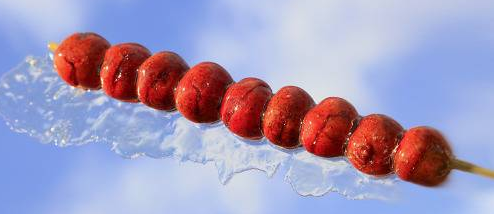

- 使用 `np.concatenate` 沿着已有的轴拼接数组

In [20]:
data = np.arange(4).reshape(2, 2)

print('axis=0: \n', np.concatenate([data, data], axis=0), '\n')
print('axis=1: \n', np.concatenate([data, data], axis=1))

axis=0: 
 [[0 1]
 [2 3]
 [0 1]
 [2 3]] 

axis=1: 
 [[0 1 0 1]
 [2 3 2 3]]


- 使用 `numpy.stack`，沿着**新轴**拼接数组序列。

`numpy.stack(arrays, axis=0)`

    - 参数：`arrays`：序列中每个数组必须具有相同的形状。

    - 参数 `axis` 指定新轴在结果尺寸中的索引。例如，`axis=0`，新增第一个维度，如果 `axis=-1`，则新增最后一个维度。

    - 返回：堆叠数组比输入数组多一个轴。

- 例子 1

In [24]:
x = np.array([2, 3, 4])
y = np.array([3, 4, 5])
x, y

(array([2, 3, 4]), array([3, 4, 5]))

In [25]:
# 下面代码将 x y 都增加一个轴，shape 都变成 [1,3] [1,3]，再沿着新增的 0-轴组合成新的数组。

xy = np.stack((x, y))
xy

array([[2, 3, 4],
       [3, 4, 5]])

In [26]:
xy[0,:]

array([2, 3, 4])

In [27]:
xy = np.stack((x, y), axis=-1)
xy

array([[2, 3],
       [3, 4],
       [4, 5]])

In [28]:
xy2 = np.stack((xy,xy), axis=-1)
xy2

array([[[2, 2],
        [3, 3]],

       [[3, 3],
        [4, 4]],

       [[4, 4],
        [5, 5]]])

In [30]:
# 沿着拼接的方向拆开看看

print(xy2[:,:,0])
print(xy2[:,:,1])

[[2 3]
 [3 4]
 [4 5]]
[[2 3]
 [3 4]
 [4 5]]


- 例子 2

In [50]:
x1 = np.arange(9).reshape((3,3))
x2 = np.arange(10,19,1).reshape((3,3))

print(x1)
print(x2)

y2 = np.stack((x1,x2),axis=0)
y2

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[10 11 12]
 [13 14 15]
 [16 17 18]]


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

- 例子 3

In [31]:
# 创建 10 个 (3,4) 二维数组，然后串起来

arrays = [np.random.randn(3, 4) for _ in range(10)]
np.stack(arrays, axis=0).shape

(10, 3, 4)

In [61]:
np.stack(arrays, axis=1).shape

(3, 10, 4)

In [62]:
np.stack(arrays, axis=2).shape

(3, 4, 10)

上面的代码相当于，先将 `shape`: `(3, 4)` 改成 `(3, 1, 4)`，再沿着中间的轴堆叠，从而将 `shape` 中间的 `1` 变成了 `10`。 

In [63]:
data

array([[0, 1],
       [2, 3]])

- 如果想 `np.concatenate` 像 `np.stack` 那样增加一个维度，则需要先对数组增加一个轴，然后再使用 `np.concatenate` 沿着那个轴连接。

In [64]:
dd = np.concatenate([data[np.newaxis,...], data[np.newaxis,...]])
dd

array([[[0, 1],
        [2, 3]],

       [[0, 1],
        [2, 3]]])

## 课堂练习

- 创建一个 $9 \times 9$ 矩阵 $A$，然后从中提取 $3 \times 3$ 子矩阵块，从左上角到右下角（每次步长为 1）共提取多少子矩阵块？


- 将所有子矩阵块沿新的轴拼接起来，得到一个三维数组 $A_$。


- 用 np.random.shuffle 打乱 $A_$ 的顺序，再求沿 0 轴最大元素的下标。

In [5]:
A = np.arange(81).reshape((9,9))
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [15]:
def get3x3_1(A):
    s = (A.shape[0]-2, A.shape[1]-2)
    if s[0] < 3 or s[1] < 3:
        return np.inf
                
    arrays = [A[i:i+3,j:j+3] for i in range(s[0]) for j in range(s[1])]    
    
    A_ = np.stack(arrays, axis=0)
    return A_

def get3x3_2(A):
    s = (A.shape[0]-2, A.shape[1]-2)
    if s[0] < 3 or s[1] < 3:
        return np.inf
    arrays = []            
    for i in range(s[0]):
        for j in range(s[1]):    
            arrays.append(A[i:i+3,j:j+3])
    
    A_ = np.stack(arrays, axis=0)
    return A_

In [17]:
A_1 = get3x3_1(A)
A_1

A_2 = get3x3_2(A)
A_2

(A_1 == A_2).all()

True

In [29]:
np.random.shuffle(A_1[:,0,0])
np.random.shuffle(A_1[:,0,1])
np.random.shuffle(A_1[:,0,2])

In [30]:
ind = A_1.argmax(axis=0)
ind

array([[32, 45,  6],
       [33, 16, 33],
       [33, 33, 33]], dtype=int64)

## 7、拆分数组

In [57]:
data = np.array([[[1, 2, 3],[4, 5, 6],[7, 8, 9]],[[-1, -2, -3],[-4, -5, -6],[-7, -8, -9]]])
data

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[-1, -2, -3],
        [-4, -5, -6],
        [-7, -8, -9]]])

- 直接用下标分开

In [58]:
x, y = data[0, ...], data[1, ...]

print(x)
print(y)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-1 -2 -3]
 [-4 -5 -6]
 [-7 -8 -9]]


- 数组展开，`numpy.ravel() vs numpy.flatten()`。

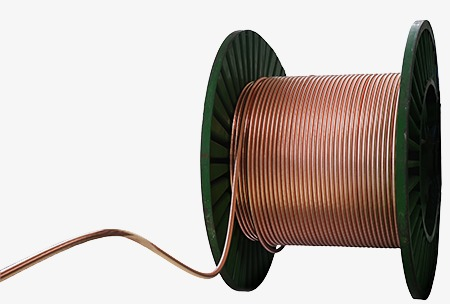

In [92]:
data = np.arange(12).reshape((3, 4))
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [93]:
# 按行展开 C 风格

data_flatten = data.flatten(order="C") 
data_flatten

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [94]:
# 按列展开， F 风格

data_flatten = data.flatten(order="F")
data_flatten

array([ 0,  4,  8,  1,  5,  9,  2,  6, 10,  3,  7, 11])

In [95]:
data_flatten[0] = 110
data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [96]:
 # 按行展开 C 风格
    
data_ravel = data.ravel()
data_ravel

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [97]:
data_ravel[0] = 110
data

array([[110,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [98]:
# 按行展开 F 风格

data[0] = 0
data_ravel = data.ravel(order='F')
data_ravel

array([ 0,  4,  8,  0,  5,  9,  0,  6, 10,  0,  7, 11])

In [99]:
data_ravel[0] = 110
data

array([[ 0,  0,  0,  0],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

- `ravel()` 和 `flatten()` 两者实现的功能是一致的（将多维数组降到一维），两者的区别在于返回拷贝（copy）还是返回视图（view），`numpy.flatten()` 返回一份拷贝，对拷贝所做的修改不会影响原始矩阵，而 `numpy.ravel()` 一般情况下返回的是视图（`view`），修改会影响原始矩阵。但是当数组不是 `C` 连续（`contiguous`）时，`numpy.ravel()` 返回的也会是拷贝。

In [91]:
# 查看是否连续

data.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

上面例子中的 `data` 数组如下，

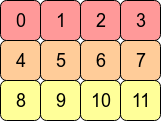

但是它的数据在内存中实际上是下面这样的，

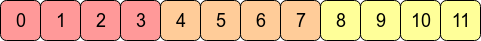

`data` 数据在内存中是连续的，但是当以 `order='F'` 展开时，是按 `[0,4,8,1,5,9,2,6,10,3,7,11]` 这个顺序，它这个顺序从内存地址上看就不是连续了，因此返回的是拷贝。

## 8、NumPy 的广播机制

首先需要清楚的一点是，**`NumPy` 的两个数组之间的相加、相减以及相乘都是对应元素之间的操作**。

- 当参与运算的两个数组维度（形状）完全相同时，直接运算，不需要广播。


- 当两个数组的形状并不相同的时候，可以通过扩展数组的方法来实现相加、相减、相乘等操作，这种机制叫做广播（`broadcasting`）。

In [101]:
a = np.array([1,2,3,4])

b = np.array([10,20,30,40])

c = a * b

c

array([ 10,  40,  90, 160])

In [102]:
a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])

b = np.array([1,2,3])

a + b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [68]:
# 相当于

a = np.array([[ 0, 0, 0],
              [10,10,10],
              [20,20,20],
              [30,30,30]])

b = np.array([1,2,3])

bb = np.tile(b, (4, 1))

print(a + bb)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]
 [31 32 33]]


### 广播机制

- 让两个输入数组都向其中 shape 最长的数组向右看齐，shape 中不足部分在前面加 1 补齐 


- 某个轴，两个输入数组的长度要么相同要么其中一个为 1，则两个数组能够用来计算，否则不能广播，运算出错；长度为 1 的向另一个数组在该轴上的长度补齐

### 图例

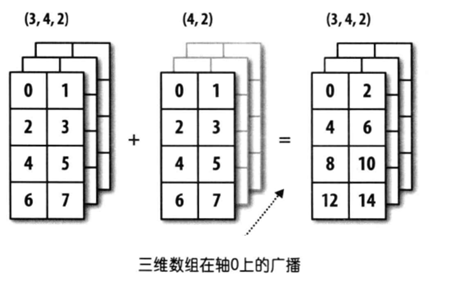

In [8]:
a = np.arange(24).reshape(3, 4, 2)
b = np.ones((4, 2))
a.shape, b.shape

((3, 4, 2), (4, 2))

In [9]:
c = a+b
c.shape

(3, 4, 2)

### 不能广播的例子

In [3]:
x = np.ones((3, 5))
y = np.zeros(8)

# 直接相加是不合法的

z = x + y

ValueError: operands could not be broadcast together with shapes (3,5) (8,) 

In [4]:
# x 是 3 行 5 列的二维数组
# y 是 8 个元素的一维数组
# 直接加 x+y 是不合法的

In [6]:
# 将 x 在最右边增加一个轴（维度）

z = x[..., None] + y
z.shape, z

((3, 5, 8), array([[[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],
 
        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]],
 
        [[1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1., 1.]]]))

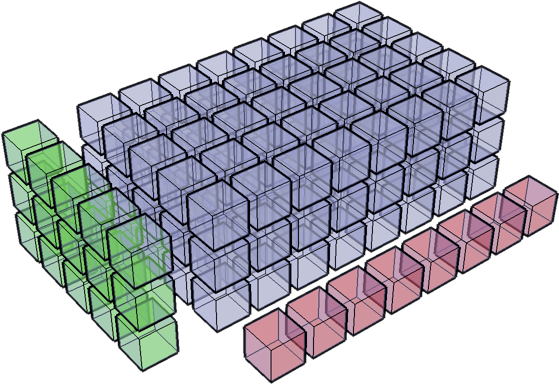

In [73]:
# 相当于 x.shape (3,5,1)
#       y.shape     (8,)
# 此时符合广播规则

In [74]:
# ( ,)      (3, 4)    (3, 5, 1)     (3, 5, 2)
# (3,)      (3, 1)    (      8)     (      8)
# ----      ------    ----------    ---------
# (3,)      (3, 4)    (3, 5, 8)     不能广播

## 课堂练习

In [ ]:
用广播机制实现数组按轴计算方差和标准差，并与 numpy 自带的函数比较。

In [ ]:
# 函数原型：

def varstd(data, axis=None):
    if axis is None:
        ...
        var = ... 
        std = ...
    else:
        ...
        var = ...
        std = ...
    return var, std

$$
\text{var} = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}
$$

$$
\text{std} = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}}
$$

或者

$$
\text{var} = \frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}
$$

$$
\text{std} = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n}}
$$

In [39]:
a = np.arange(640).reshape(10, 8, 8)

In [40]:
varstd(a)

(34133.25, 184.7518606130937)

In [42]:
a.var(axis=0), a.std(axis=0)
a.var(), a.std()

(34133.25, 184.7518606130937)

### 最后，回顾下 `reshape()` 函数

- 图解函数 `reshape()`

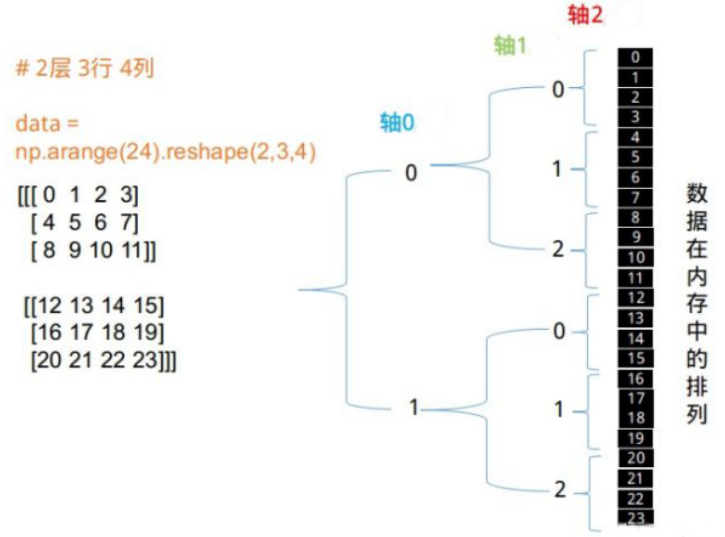

## 课堂练习

#### 用 NumPy 计算矩阵行列式

- 矩阵行列式的定义为

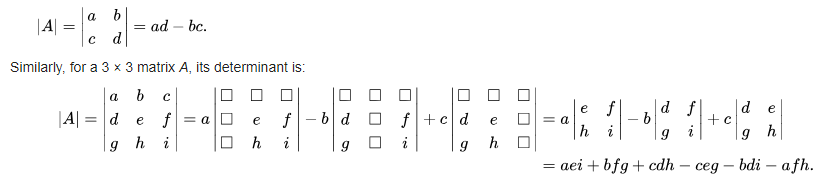

In [94]:
import numpy as np

In [88]:
def det1(A):

    if A.shape[0] == 2: # 2x2: det = ad - cb
        return (A[0,0] * A[1,1]) - (A[0,1] * A[1,0])
    else:
        sign = -1
        resultant = 0
        for j in range(A.shape[0]):
            sign *= -1
            A0j = np.delete(A[1:], j, 1)
            resultant += sign*A[0,j]*det1(A0j)
            
        return resultant

In [89]:
def det2(A):
    
    if A.shape[0] == 2: # 2x2: det = ad - cb
        return (A[0,0] * A[1,1]) - (A[0,1] * A[1,0])
    else:
        sign = -1
        resultant = 0
        for j in range(A.shape[0]):
            sign *= -1
            A0j = np.concatenate((A[1:,:j],A[1:,j+1:]), axis=1)
            resultant += sign*A[0,j]*det2(A0j)

        return resultant

In [90]:
A = np.array([[3,2,1],[2,3,1],[1,2,3]])
A

array([[3, 2, 1],
       [2, 3, 1],
       [1, 2, 3]])

In [91]:
%timeit det1(A)

18 µs ± 84.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [92]:
%timeit det2(A)

7.5 µs ± 48.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [93]:
M = np.random.randn(5,5)
M

array([[ 1.41437719, -0.12405066,  2.00815709,  0.22988654,  0.60489373],
       [ 1.62715982,  1.59456053,  0.23043417, -0.06491034, -0.96898025],
       [ 0.59124281, -0.7827755 , -0.44423283, -0.34518616, -0.88180055],
       [-0.44265324, -0.5409163 , -1.32322737, -0.11279892,  0.90734594],
       [ 0.81526991,  0.22909795, -1.02617878,  0.47752547,  1.29269823]])

In [95]:
%timeit np.linalg.det(M)
%timeit det1(M)
%timeit det2(M) 

4.12 µs ± 72.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
503 µs ± 3.53 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
216 µs ± 24.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
